In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Импорт данных

* Загрузим необходимы библиотеки

In [3]:
import pandas as pd                  # Импорт библиотеки pandas для работы с табличными данными (DataFrame)
import numpy as np                   # Импорт библиотеки numpy для работы с массивами и числовыми операциями
import seaborn as sns                # Импорт библиотеки seaborn для создания красивых и информативных визуализаций данных
from matplotlib import pyplot as plt # Импорт функции pyplot из библиотеки matplotlib для создания графиков и визуализаций

* Загрузим набор данных **S02-hw-dataset.csv**

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/Datasets/S02-hw-dataset.csv')
data.head() # Вывод первых пяти строк датасета


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [8]:
data.tail() # Вывод последних пяти строк датасета

,user_id,age,country,purchases,revenue
36,37,18.0,DE,4,1104
37,38,35.0,DE,3,738
38,39,39.0,FR,7,1162
39,40,34.0,RU,7,2086
40,10,24.0,RU,7,511


# Проверка данных

* Узнаем количество строк и столбцов

In [13]:
print("Количество строк:", data.shape[0])
print("Количество столбцов:", data.shape[1])

Количество строк: 41
Количество столбцов: 5


* Посмотрим информацию о признаках

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


* Выведем названия всех признаков в наборе данных

In [20]:
data.columns

Index(['user_id', 'age', 'country', 'purchases', 'revenue'], dtype='object')

* Посмотрим описательную статистику числовых признаков с помощью метода  **.describe()**, округлив значения до 2-х знаков после запятой c помощью **round()**

In [24]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
user_id,41.0,20.24,11.66,1.0,10.0,20.0,30.0,40.0
age,39.0,36.51,18.30,5.0,24.0,33.0,45.5,120.0
purchases,41.0,4.83,2.71,-1.0,3.0,5.0,7.0,11.0
revenue,41.0,820.05,613.13,0.0,432.0,693.0,1115.0,2475.0


* Посмотрим описательную статистику категорийных признаков с помощью метода **.describe()**

In [23]:
data.describe(include='object').T

,count,unique,top,freq
country,41,5,RU,13


# Пропуски, дубликаты и базовый контроль качества

# Пропущенные значения

В pandas пропуски обозначаются специальным символом NaN (Not-a-Number — «не число»).

В библиотеке pandas реализован метод isnull(), возвращающий новый DataFrame, в ячейках которого стоят булевы значения True и False. True ставится на месте, где ранее находилось значение NaN.

In [31]:
data.isnull().head()

,user_id,age,country,purchases,revenue
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,True,False,False,False


Из таблицы можно увидеть, где были пропущены значения, а где изначально заполнены:
* ячейки со значением True - значения пропущены;
* ячейки, где стоит False, были изначально заполнены.



* Проверим количество пропусков в каждом столбце

In [37]:
data.isnull().sum()

,0
user_id,0
age,2
country,0
purchases,0
revenue,0


**Выведем список столбцов с долей пропусков в каждом столбце с помощью **.isna().mean()****

In [35]:
data.isnull().mean() * 100

,0
user_id,0.000000
age,4.878049
country,0.000000
purchases,0.000000
revenue,0.000000


# Дубликаты

**Дубликатами** называются записи, для которых значения (всех или большинства) признаков совпадают.

За дубликаты можно посчитать записи, у которых совпадают либо все признаки, либо только часть признаков.

**Метод **duзlicated()****

Возвращает булеву маску для фильтрации. Для записей, у которых совпадают признаки, переданные методу, он возвращает True, для остальных — False.

Параметр **subset** — список признаков, по которым производится поиск дубликатов.

По умолчанию используются все столбцы в DataFrame и ищутся полные дубликаты.

In [38]:
dupl_columns = list(data.columns)
mask = data.duplicated(subset=dupl_columns)
data_duplicates = data[mask]
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')

Число найденных дубликатов: 1


# Базовый контроль качества

In [64]:
condition_1 = (data['user_id'] < 0)
count_invalid_rows = condition_1.sum()

if count_invalid_rows > 0:
  print('Есть строки, где данные заполнены некорреткно.')
  print('Индексы этих строк:')
  print(data.index[condition_1].tolist())
  print(f'Количество таких строк: {count_invalid_rows}')

else:
  print(f'Значения заполнены корреткно.')


Значения заполнены корреткно.


* **Вывод:**

Все значения в признаке **user_id** заполнены корреткно. Отрицательные значения отсутсвуют.

In [73]:
condition_2 = ((data['age'] <= 0) | (data['age'] > 100))
count_invalid_rows = condition_2.sum()

if count_invalid_rows > 0:
  print('Есть строки, где данные заполнены некорреткно.')
  print('Индексы этих строк:')
  print(data.index[condition_2].tolist())
  print(f'Количество таких строк: {count_invalid_rows}')

else:
  print(f'Значения заполнены корреткно.')


Есть строки, где данные заполнены некорреткно.
Индексы этих строк:
[5]
Количество таких строк: 1


In [74]:
display(data.loc[5])

,5
user_id,6
age,120.0
country,FR
purchases,-1
revenue,785


* **Вывод:**

В признаке **age** с индексом 5 значение больше 100, а именно равно 120, что недопустимо.

In [76]:
# Проверим, если доход меньше или равен нулю, то количество покупок не должно быть больше 0
condition_3 = ((data['revenue'] <= 0) & (data['purchases'] > 0) | (data['purchases'] < 0) )
count_invalid_rows = condition_3.sum()

if count_invalid_rows > 0:
  print('Есть строки, где данные заполнены некорреткно.')
  print('Индексы этих строк:')
  print(data.index[condition_3].tolist())
  print(f'Количество таких строк: {count_invalid_rows}')
else:
  print(f'Значения заполнены корреткно.')

Есть строки, где данные заполнены некорреткно.
Индексы этих строк:
[5, 10]
Количество таких строк: 2


In [71]:
display(data.loc[5])

,5
user_id,6
age,120.0
country,FR
purchases,-1
revenue,785


* **Вывод:**

В признаке **purchases** с индексом 5 значение -1, что недопустимо, так как покупка не может быть отрицательым значением.

In [72]:
display(data.loc[10])

,10
user_id,11
age,24.0
country,US
purchases,4
revenue,0


* **Вывод:**

В признаке **purchases** с индексом 10 при 0 значении зарплаты (revenue) 4 покупки (purchases), что недопустимо.

In [75]:
condition_4 = (data['revenue'] < 0)
count_invalid_rows = condition_4.sum()

if count_invalid_rows > 0:
  print('Есть строки, где данные заполнены некорреткно.')
  print('Индексы этих строк:')
  print(data.index[condition_4].tolist())
  print(f'Количество таких строк: {count_invalid_rows}')
else:
  print(f'Значения заполнены корреткно.')

Значения заполнены корреткно.


* **Вывод:**

В признаке **revenue** все значения заполнены корректно.

**ИТОГ ПО БАЗОВОМУ КОНТРОЛЮ КАЧЕСТВА**
* В признаках **user_id** и **revenue** значения заполнены корректно.
* В признакt **age** с индексом 5 значение больше 100, а именно равно 120, что недопустимо.
* В признаке **purchases** с индексом 5 присутсвует отрицательное значение, а также в признаке **purchases** с индексом 10 при 0 значении зарплаты (revenue) 4 покупки (purchases), что недопустимо.

# Базовый EDA: группировки, агрегаты и частоты

* Посчитать частоты для категориальной переменной с помощью `value_counts()`.

In [77]:
data['country'].value_counts()

,count
country,
RU,13
FR,12
US,8
DE,6
CN,2


* Выполнить группировку с агрегатами через `groupby`

**Группировка по стране**

In [86]:
country_stats = data.groupby('country').agg(
    users_count=('user_id', 'count'),         # Количество пользователей
    avg_age=('age', 'mean'),                  # Средний возраст
    total_purchases=('purchases', 'sum'),     # Общее количество покупок
    avg_purchases=('purchases', 'mean'),      # Средний чек покупок
    total_revenue=('revenue', 'sum'),         # Общая сумма зарплаты
    avg_revenue=('revenue', 'mean')           # Средняя зарплата
).round(2).reset_index()

display(country_stats)

,country,users_count,avg_age,total_purchases,avg_purchases,total_revenue,avg_revenue
0,CN,2,24.00,9,4.50,2108,1054.00
1,DE,6,34.60,39,6.50,8673,1445.50
2,FR,12,46.25,51,4.25,8111,675.92
3,RU,13,30.08,62,4.77,10271,790.08
4,US,8,36.71,37,4.62,4459,557.38


**ВЫВОД**
* Наибольшее количесвто пользователей (13) в **RU**, а наименьшее (2) в **CN**.
* Наибольший средний возраст (46.25) в **FR**, а наименьший (24.00) в **CN**.
* Наибольшее количество покупок (62) в **RU**, а наименьшее (9) в **CN**.
* Наибольшая зарплата (10271) в **RU**, а наименьшая (2108) в **CN**.

# Визуализация данных в Matplotlib

* Построим гистограмму

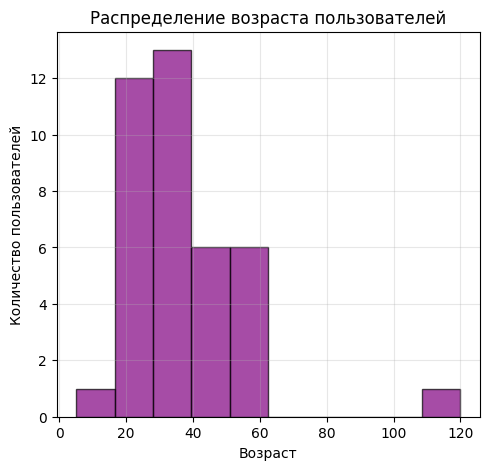

In [91]:

# Удаляем пропуски в возрасте для корректного построения
age_data = data['age'].dropna()

plt.figure(figsize=(12, 5))

# Гистограмма возраста
plt.subplot(1, 2, 1)
plt.hist(age_data, bins=10, color='purple', edgecolor='black', alpha=0.7)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(True, alpha=0.3)

plt.show()

**ВЫВОДЫ**
* Доминирующая возрастная группа — молодежь и зрелые взрослые (до 40 лет).

Наибольшее количество пользователей (около 13 человек) приходится на возрастную группу 20–40 лет. Это указывает на то, что основная аудитория сервиса или продукта — это люди в активном трудоспособном и потребительском возрасте.

* Вторая по численности группа — 40–60 лет.

В этой возрастной категории насчитывается около 6 пользователей. Это говорит о том, что зрелые взрослые также активно пользуются сервисом, хотя их доля значительно меньше, чем у более молодой группы.
Наличие выбросов и аномальных значений.

* Есть один пользователь с возрастом 120 лет, что является явным выбросом и, скорее всего, ошибкой в данных. Такие значения могут искажать статистические показатели и требуют проверки и корректировки перед дальнейшим анализом.


**Построим боксплот**

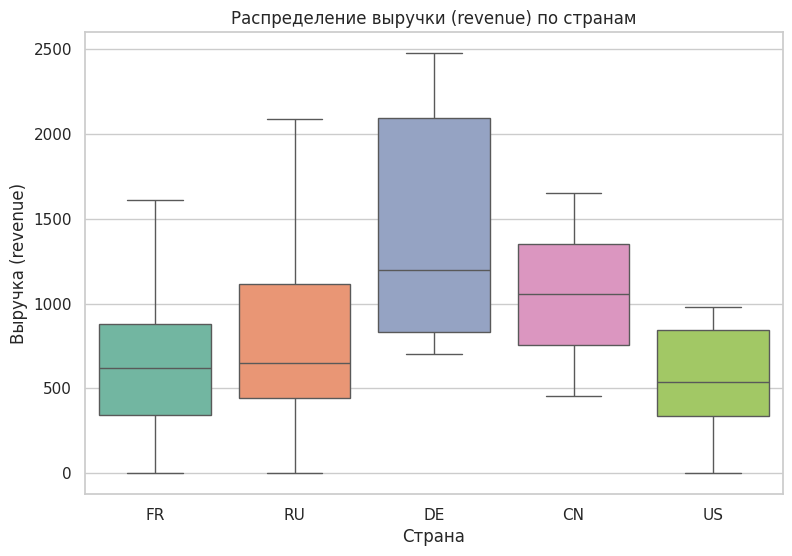

In [104]:
# Построение boxplot: revenue по странам
sns.set(style="whitegrid")

# Create a boxplot with unique color per country
plt.figure(figsize=(9, 6))
sns.boxplot(data=data, x='country', y='revenue', palette='Set2')  # or 'husl', 'tab10', etc.
plt.title('Распределение выручки (revenue) по странам')
plt.xlabel('Страна')
plt.ylabel('Выручка (revenue)')
plt.show()

**ВЫВОДЫ**
* Наибольшая медианная выручка в Германии (DE).

Медиана для Германии находится на уровне примерно 1200-1300, что значительно выше, чем у других стран. Это означает, что половина всех пользователей из Германии имеет выручку выше этого значения.

* Наименьшая медианная выручка в США (US).

Медиана для США самая низкая среди всех стран — около 500. Это говорит о том, что "типичный" пользователь из США приносит меньше выручки, чем типичный пользователь из других стран.

* Самый широкий разброс выручки в Германии (DE).

Длина всех "усов" (от минимального до максимального значения) и самой коробки (от 25-го до 75-го перцентиля) для Германии самая большая. Это указывает на высокую вариативность: есть как очень "прибыльные", так и менее "прибыльные" пользователи.

* Самый узкий разброс в США (US).

Коробка и усы для США самые короткие, что говорит о более однородном (менее вариативном) распределении выручки среди пользователей этой страны.

**Построим диаграмму рассеяния**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
График сохранен: /content/drive/MyDrive/scatter_plot.png


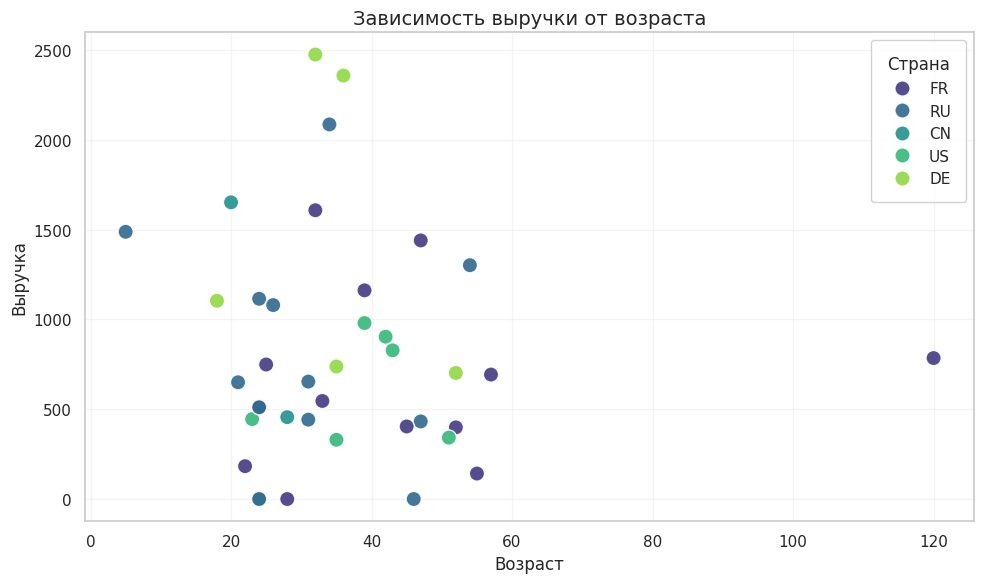

In [120]:
import os
from google.colab import drive

# Подключаем Google Диск
drive.mount('/content/drive')

# Создаем новый DataFrame с нужными столбцами
scatter_df = data[['age', 'revenue', 'country']].dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=scatter_df,
    x='age',
    y='revenue',
    hue='country',
    palette='viridis',
    s=120,
    edgecolor='w',
    linewidth=1,
    alpha=0.9
)

plt.title('Зависимость выручки от возраста', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Выручка', fontsize=12)

plt.legend(title='Страна',
           loc='upper right',
           frameon=True,
           framealpha=0.9,
           fancybox=True,
           borderpad=1)

plt.grid(True, alpha=0.2)
plt.tight_layout()

# Путь к вашей папке (из URL видно, что это папка с ID: 1RRlI1NvASHzzH-6H8RmQUwAEVYkfEMtz)
# Вам нужно узнать её фактический путь на Google Диске
folder_id = '1RRlI1NvASHzzH-6H8RmQUwAEVYkfEMtz'

# Способ 1: Если вы знаете название папки или путь
save_path = '/content/drive/MyDrive/scatter_plot.png'  # измените на нужный путь

# Способ 2: Используйте этот код чтобы найти нужную папку
import pandas as pd

# Поиск папки по ID (если она у вас открыта в браузере)
# Обычно папки находятся в MyDrive или подпапках

# Лучший способ: определите путь вручную
# Откройте файловый менеджер Colab (значок папки слева)
# Найдите вашу папку и щелкните правой кнопкой -> "Копировать путь"

# Сохраняем график
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"График сохранен: {save_path}")

plt.show()

**ВЫВОД**
* Отсутствие четкой линейной зависимости.

На графике не наблюдается явной тенденции к росту или падению выручки с увеличением возраста. Точки распределены довольно хаотично по всему полю диаграммы. Это означает, что возраст в данном датасете не является сильным предиктором для выручки.
Наличие выбросов по возрасту.

* Видна одна точка с возрастом 120 лет (пурпурная, FR).

Это явный аномальный случай, который может быть ошибкой ввода данных. Такой пользователь имеет выручку около 800, что не является экстремальным значением для этой страны, но его возраст выделяется.

* Различия между странами:

     * Германия (DE) — пользователи из этой страны часто имеют высокую выручку (особенно в возрасте 30-40 лет), что согласуется с данными из boxplot'а.

     *    Россия (RU) — здесь видно большое количество пользователей с нулевой выручкой (точки на оси X), что указывает на низкую конверсию или наличие "зрительских" пользователей.

    * Франция (FR) — распределение выручки по возрасту довольно широкое, есть как пользователи с нулевой выручкой, так и с высокой (до 1600+).

    * США (US) — большинство точек сосредоточено в среднем диапазоне выручки (от 300 до 1000), что подтверждает данные из boxplot'а о стабильности, но невысоком уровне выручки.

    * Китай (CN) — в выборке мало данных, но один пользователь в возрасте ~20 лет имеет очень высокую выручку (около 1650).

* Пользователи с нулевой выручкой.

Несколько точек лежат на оси X (выручка = 0), что означает, что эти пользователи совершили покупки, но их общая выручка равна нулю (возможно, это бесплатные товары, возвраты или ошибки в данных).